#Final Project (Energy Consumption)

##Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

##Upload the data

In [ ]:
features = pd.read_csv('/content/weather.csv') #Features
labels = pd.read_csv('/content/electricity.csv') #Targets

##Data Prepration

In [ ]:
features.shape, labels.shape

((331166, 10), (17544, 1579))

###Features

In [ ]:
features.sample(5)

,timestamp,site_id,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,precipDepth6HR,seaLvlPressure,windDirection,windSpeed
150907,2017-04-16 20:00:00,Gator,22.2,4.0,16.1,0.0,NaN,1021.5,100.0,4.1
313490,2017-12-23 14:00:00,Cockatoo,-1.0,NaN,-1.0,NaN,NaN,NaN,310.0,4.6
14781,2017-09-07 21:00:00,Panther,27.2,NaN,24.4,0.0,NaN,1016.3,30.0,5.1
184707,2017-02-22 23:00:00,Bobcat,-0.6,NaN,-3.9,0.0,15.0,1007.7,120.0,1.5
61054,2016-12-18 07:00:00,Rat,15.6,6.0,12.8,0.0,NaN,1008.3,200.0,8.2


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331166 entries, 0 to 331165
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       331166 non-null  object 
 1   site_id         331166 non-null  object 
 2   airTemperature  331038 non-null  float64
 3   cloudCoverage   160179 non-null  float64
 4   dewTemperature  330838 non-null  float64
 5   precipDepth1HR  197980 non-null  float64
 6   precipDepth6HR  18162 non-null   float64
 7   seaLvlPressure  309542 non-null  float64
 8   windDirection   318161 non-null  float64
 9   windSpeed       330592 non-null  float64
dtypes: float64(8), object(2)
memory usage: 25.3+ MB


In [ ]:
features.isna().sum()

,0
timestamp,0
site_id,0
airTemperature,128
cloudCoverage,170987
dewTemperature,328
precipDepth1HR,133186
precipDepth6HR,313004
seaLvlPressure,21624
windDirection,13005
windSpeed,574


In [ ]:
features['site_id'].nunique()

19

In [ ]:
nan_in_col = []
for i in features.columns:
  nan_in_col.append(np.round((features[i].isna().sum() / features.shape[0]), 3) * 100)

In [ ]:
nan_in_col

[0.0, 0.0, 0.0, 51.6, 0.1, 40.2, 94.5, 6.5, 3.9, 0.2]

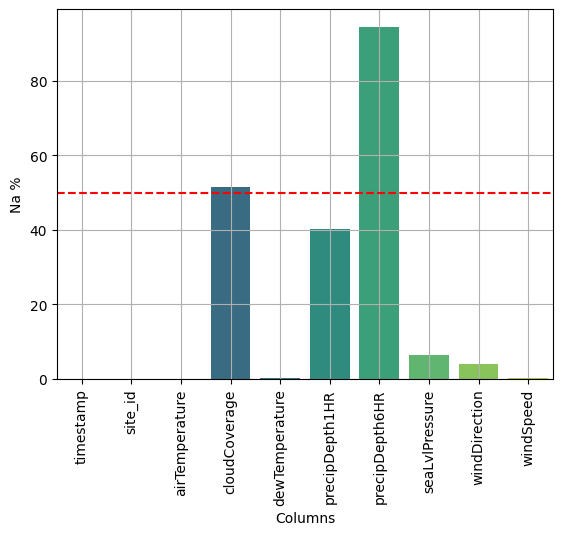

In [ ]:
sns.barplot(x=features.columns, y=nan_in_col, palette='viridis')
plt.yscale('linear')
plt.ylabel('Na %')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.axhline(y=50, color='r', linestyle='--')
plt.grid(True)
plt.show()

In [ ]:
features.drop(['cloudCoverage', 'precipDepth6HR'], axis=1, inplace=True)

To choose which site to use
first i needed to know how many missing values are there in each site

In [ ]:
total_isna = 0
total_isna_list = []
for i in features['site_id'].unique():
  na = features[features['site_id'] == i].isna().sum()
  for j in features.columns:
    total_isna += na[j]
  total_isna_list.append(total_isna)
  print(i, '\n','Total', '     ',total_isna, '\n', na, '\n')

Panther 
 Total       837 
 timestamp           0
site_id             0
airTemperature      3
dewTemperature      3
precipDepth1HR      9
seaLvlPressure    323
windDirection     499
windSpeed           0
dtype: int64 

Robin 
 Total       18422 
 timestamp             0
site_id               0
airTemperature        1
dewTemperature        1
precipDepth1HR    17516
seaLvlPressure       61
windDirection         6
windSpeed             0
dtype: int64 

Fox 
 Total       19775 
 timestamp            0
site_id              0
airTemperature       1
dewTemperature       1
precipDepth1HR      71
seaLvlPressure      53
windDirection     1215
windSpeed           12
dtype: int64 

Rat 
 Total       20440 
 timestamp           0
site_id             0
airTemperature      6
dewTemperature      9
precipDepth1HR     49
seaLvlPressure    300
windDirection     290
windSpeed          11
dtype: int64 

Bear 
 Total       22243 
 timestamp            0
site_id              0
airTemperature       0
dewTempe

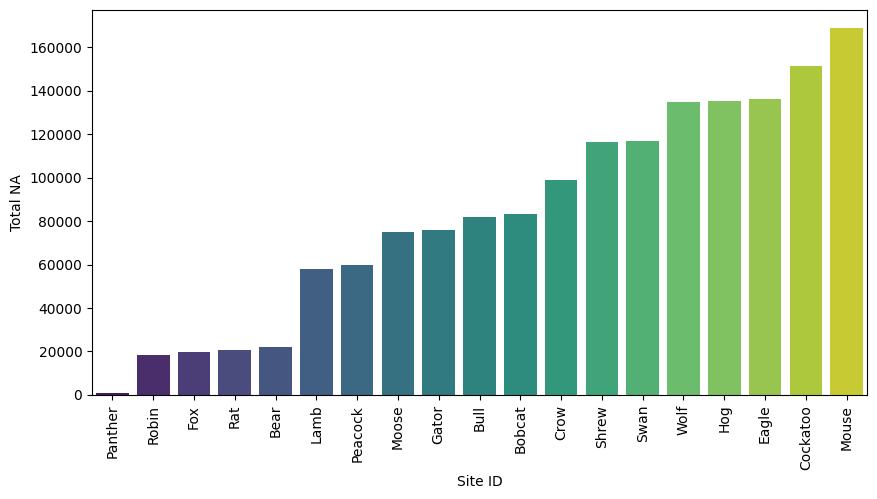

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=features['site_id'].unique(), y=total_isna_list, palette='viridis')
plt.ylabel('Total NA')
plt.xlabel('Site ID')
plt.xticks(rotation=90)
plt.show()

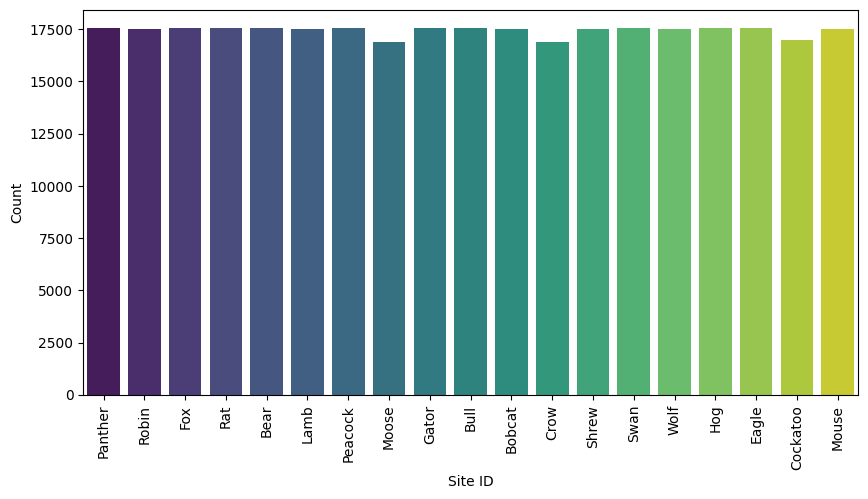

In [ ]:
#Check if they all have the same or close count (No. of rows)
plt.figure(figsize=(10, 5))
sns.countplot(x=features['site_id'], palette='viridis')
plt.xlabel('Site ID')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

i chose Panther site because it has the least missing values

In [ ]:
x = features[features['site_id'] == 'Panther']

In [ ]:
x.shape[0], features.shape[0]

(17544, 331166)

In [ ]:
x.to_csv('x.csv')

###Target

In [ ]:
len(labels.columns)

1579

In [ ]:
labels.columns[0]

'timestamp'

In [ ]:
#How many Panther sites
panthers = []
for i in labels.columns:
  if 'Panther' in i:
    panthers.append(i)
    print(i)

Panther_parking_Lorriane
Panther_lodging_Cora
Panther_office_Hannah
Panther_lodging_Hattie
Panther_education_Teofila
Panther_education_Jerome
Panther_retail_Felix
Panther_parking_Asia
Panther_education_Misty
Panther_retail_Gilbert
Panther_office_Catherine
Panther_education_Tina
Panther_education_Janis
Panther_office_Patti
Panther_retail_Romeo
Panther_office_Lauretta
Panther_parking_Alaina
Panther_office_Valarie
Panther_lodging_Blaine
Panther_office_Karla
Panther_education_Quintin
Panther_assembly_Pamella
Panther_office_Graham
Panther_office_Larry
Panther_lodging_Jorge
Panther_education_Violet
Panther_lodging_Edison
Panther_office_Ruthie
Panther_lodging_Awilda
Panther_lodging_Gale
Panther_education_Edna
Panther_lodging_Kara
Panther_office_Garth
Panther_parking_Mellissa
Panther_assembly_Carrol
Panther_lodging_Jana
Panther_lodging_Myrtle
Panther_education_Sophia
Panther_office_Shauna
Panther_other_Bethel
Panther_lodging_Cornelia
Panther_education_Hugh
Panther_lodging_Marisol
Panther_other

In [ ]:
len(panthers)

105

each id has zero values and missing values and both will be droped
so first i need to know which site has the least zeros and missing values

In [ ]:
panthers_p = dict()
for i in panthers:
  na = labels[i].isna().sum() #missing values in site
  zeros = labels[i].value_counts()[0] #zeros in the site
  total_p = zeros + na #Their sum
  panthers_p[i] = [na, zeros, total_p]

In [ ]:
panthers_p = {k: v for k, v in sorted(panthers_p.items(), key=lambda item: item[1][-1])} #Sort the sites

In [ ]:
panthers_p

{'Panther_retail_Lester': [11, 1922, 1933],
 'Panther_lodging_Kirk': [12, 3081, 3093],
 'Panther_office_Clementine': [10, 3171, 3181],
 'Panther_education_Misty': [20, 3237, 3257],
 'Panther_education_Violet': [12, 3258, 3270],
 'Panther_education_Cleopatra': [79, 3199, 3278],
 'Panther_lodging_Willa': [11, 3280, 3291],
 'Panther_education_Scarlett': [10, 3292, 3302],
 'Panther_education_Sophia': [10, 3303, 3313],
 'Panther_education_Emily': [12, 3321, 3333],
 'Panther_parking_Mellissa': [11, 3332, 3343],
 'Panther_education_Mohammad': [11, 3336, 3347],
 'Panther_lodging_Cora': [11, 3340, 3351],
 'Panther_education_Edna': [17, 3339, 3356],
 'Panther_lodging_Kara': [12, 3347, 3359],
 'Panther_education_Gina': [11, 3352, 3363],
 'Panther_education_Tina': [10, 3357, 3367],
 'Panther_education_Enriqueta': [41, 3330, 3371],
 'Panther_retail_Kristina': [11, 3361, 3372],
 'Panther_parking_Alaina': [12, 3361, 3373],
 'Panther_parking_Lorriane': [11, 3371, 3382],
 'Panther_lodging_Jorge': [11, 

Iam going to use (Panther_retail_Lester) as it has the least zeros and missing values

<Axes: xlabel='Panther_retail_Lester', ylabel='Density'>

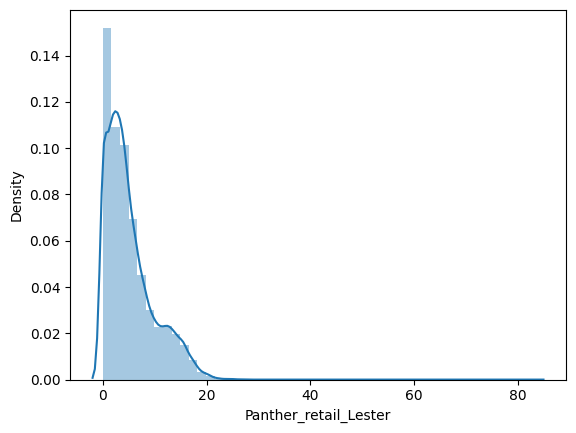

In [ ]:
sns.distplot(labels['Panther_retail_Lester'])

In [ ]:
y = labels[['timestamp','Panther_retail_Lester']]

In [ ]:
y.dropna(inplace=True)
y.to_csv('y.csv')

##Data Preprocessing

In [ ]:
# os.kill(os.getpid(), 9)

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
# x = pd.read_csv('x.csv')
# y = pd.read_csv('y.csv')

# if 'Unnamed: 0' in x.columns:
#   x.drop('Unnamed: 0', axis=1, inplace=True)
# if 'Unnamed: 0' in y.columns:
#   y.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
#Merge features and target
df = pd.merge(x, y, on='timestamp', how='inner')

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp']) #Change the type of the (Time stamp) columns into date time

In [ ]:
df.set_index('timestamp', inplace=True) #Change the index of the DF to be the time

###Missing Values

In [ ]:
df.isna().sum()

,0
site_id,0
airTemperature,3
dewTemperature,3
precipDepth1HR,9
seaLvlPressure,323
windDirection,499
windSpeed,0
Panther_retail_Lester,0


In [ ]:
df.drop('site_id', axis=1, inplace=True)

In [ ]:
for i in df.columns:
  Na = np.round(df[i].isna().sum()*100 / df.shape[0], 3) #Check the percentage of the missing values in each column
  print(f'Columns {i} : {Na} %')

Columns airTemperature : 0.017 %
Columns dewTemperature : 0.017 %
Columns precipDepth1HR : 0.051 %
Columns seaLvlPressure : 1.842 %
Columns windDirection : 2.846 %
Columns windSpeed : 0.0 %
Columns Panther_retail_Lester : 0.0 %


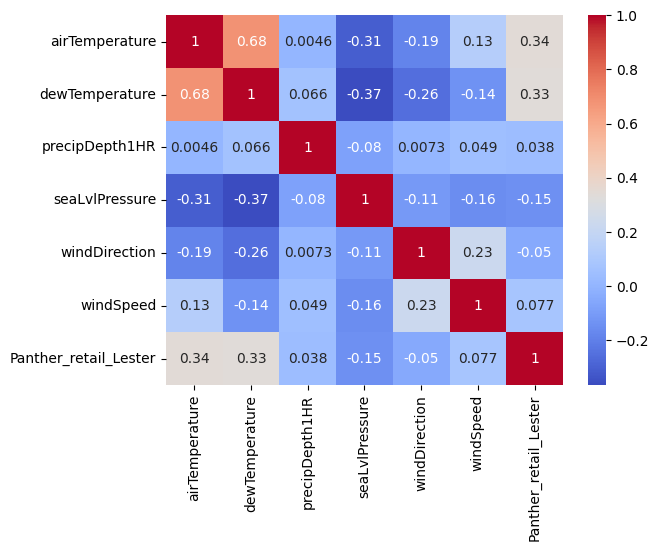

In [ ]:
#View the correlation between the features and the target
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df.drop('precipDepth1HR', axis=1, inplace=True) #As it has the most missing values and least corr. with target

In [ ]:
na = [] #Total missing values
na_ = [] #Percentage of the missing Values
for i in df.columns:
  na.append(df[i].isna().sum())
  na_.append(np.round(df[i].isna().sum()*100 / df.shape[0], 3))

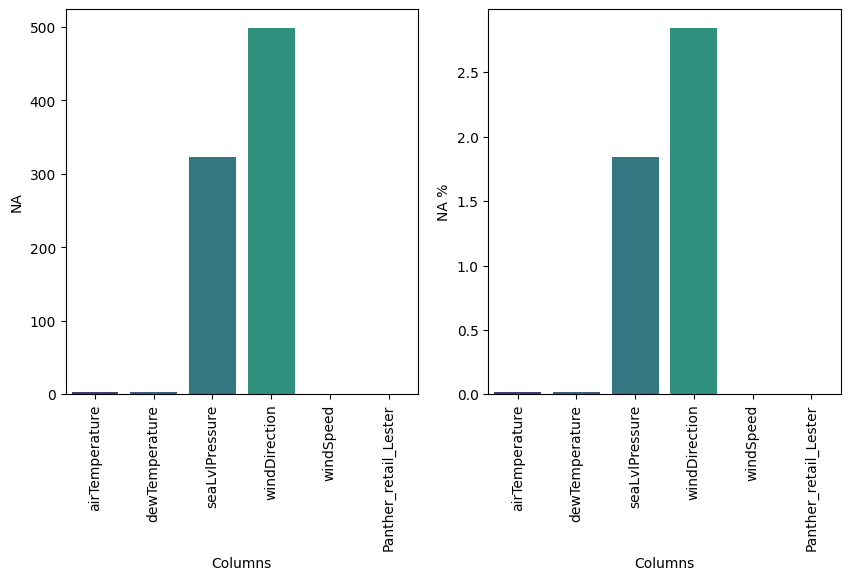

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=df.columns, y=na, palette='viridis')
plt.yscale('linear')
plt.xlabel('Columns')
plt.ylabel('NA')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=df.columns, y=na_, palette='viridis')
plt.yscale('linear')
plt.xlabel('Columns')
plt.ylabel('NA %')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [ ]:
imputed = imputer.fit_transform(df) #Fill the missing values using mean

In [ ]:
df_imputed = pd.DataFrame(imputed, columns=df.columns, index=df.index)

###Zero Values

In [ ]:
#Test
df_imputed.index.month.unique()

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='timestamp')

In [ ]:
#Test
0 in df_imputed[df_imputed.index.month == 7].iloc[:, -1].value_counts()

False

In [ ]:
zeros = [] #List of the missing values in each month
data_size = df_imputed.shape[0]
print('Month {i} : {zeros count} : {zeros count / data size} % : {zeros count / Total month count)}')


for i in df_imputed.index.month.unique():

  if 0 in df_imputed[df_imputed.index.month == i].iloc[:, -1].value_counts(): #If this month has zero values

    count = df_imputed[df_imputed.index.month == i].iloc[:, -1].value_counts()[0] #Count of the zero values
    zeros.append(count)
    month_size = df_imputed[df_imputed.index.month == i].shape[0]

    print(f'Month {i} : {count} : {np.round(count / data_size * 100, 2)} % : {np.round(count / month_size * 100, 2)}')

  else : #If the month doesn't have zero values

    zeros.append(0)
    print(f'Month {i} : 0')

Month {i} : {zeros count} : {zeros count / data size} % : {zeros count / Total month count)}
Month 1 : 0
Month 2 : 0
Month 3 : 729 : 4.16 % : 49.02
Month 4 : 720 : 4.11 % : 50.0
Month 5 : 473 : 2.7 % : 31.79
Month 6 : 0
Month 7 : 0
Month 8 : 0
Month 9 : 0
Month 10 : 0
Month 11 : 0
Month 12 : 0


In [ ]:
zeros_p = [] #The percentage of zero values
for i in zeros:
  zeros_p.append(np.round(i / data_size * 100, 2))

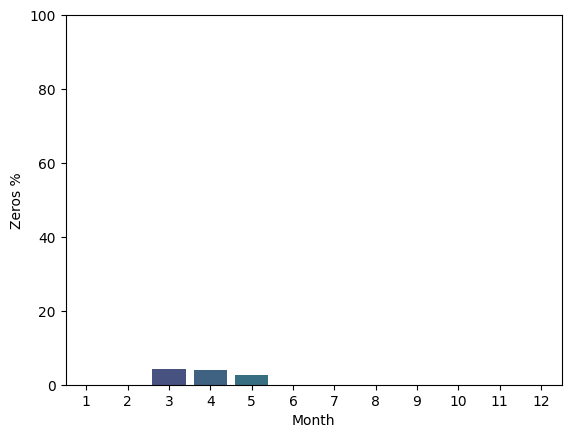

In [ ]:
sns.barplot(x=df_imputed.index.month.unique(), y=zeros_p , palette='viridis')
plt.xlabel('Month')
plt.ylabel('Zeros %')
plt.ylim(0, 100)
plt.show()

In [ ]:
df_imputed['Panther_retail_Lester'].replace(0, np.nan, inplace=True) #Replace the zero values with nan

In [ ]:
df_imputed['Panther_retail_Lester'].isna().sum() / df_imputed.shape[0] * 100 #The percentage if the missing values

10.962185592881994

In [ ]:
df_imputed.dropna(inplace=True) #Drop the zero values

In [ ]:
#Save the chosed data
df_imputed.to_csv('df_imputed.csv')

In [ ]:
df_imputed = pd.read_csv('df_imputed.csv')

In [ ]:
df_imputed.isna().sum()

,0
timestamp,0
airTemperature,0
dewTemperature,0
seaLvlPressure,0
windDirection,0
windSpeed,0
Panther_retail_Lester,0


In [ ]:
df_imputed.drop('timestamp', axis = 1, inplace = True)

In [ ]:
df_imputed.head()

,airTemperature,dewTemperature,seaLvlPressure,windDirection,windSpeed,Panther_retail_Lester
0,19.4,19.4,1017.751383,0.0,0.0,15.6030
1,21.1,21.1,1019.400000,0.0,0.0,15.7230
2,21.1,21.1,1018.800000,210.0,1.5,16.0831
3,20.6,20.0,1018.100000,0.0,0.0,15.7230
4,21.1,20.6,1019.000000,290.0,1.5,15.7230


###Outliers

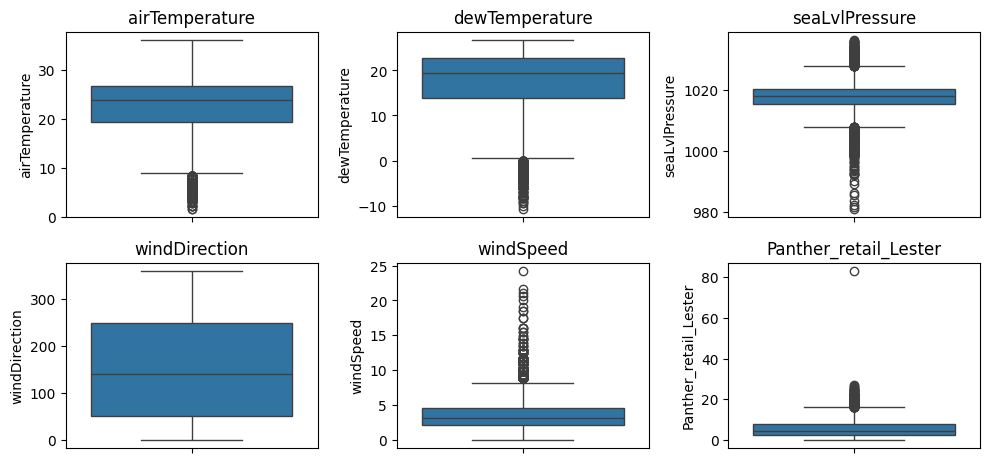

In [ ]:
##Check if there are outliers

plt.figure(figsize=(10, 7))
for i, col in enumerate(df_imputed.columns):
  plt.subplot(3, 3, i + 1)
  sns.boxplot(df_imputed[col])
  plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
df_outliers = df_imputed.copy()

In [ ]:
df_outliers.shape

(15611, 6)

In [ ]:
# remove the outliers from the data
outliers_old = df_outliers.shape[0]
outliers_new = 0

while True: #Infinity Loop

  outliers_old = df_outliers.shape[0] #Put the shape of the data before removing Outliers

  for i in df_outliers.columns: #Remove outliers from from each column
    Q1 = df_outliers[i].quantile(0.25)
    Q3 = df_outliers[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_outliers = df_outliers[(df_outliers[i] >= lower_bound) & (df_outliers[i] <= upper_bound)]

  outliers_new = df_outliers.shape[0] #Put the new shape of the data after removing the outliers
  print(outliers_old, outliers_new)

  if outliers_old == outliers_new: #If the shape doesn't change (No outliers)
    break #Stop the loop

15611 13680
13680 12602
12602 12407
12407 12305
12305 12100
12100 12032
12032 11980
11980 11937
11937 11919
11919 11908
11908 11892
11892 11878
11878 11872
11872 11869
11869 11863
11863 11860
11860 11859
11859 11859


In [ ]:
df_outliers.shape

(11859, 6)

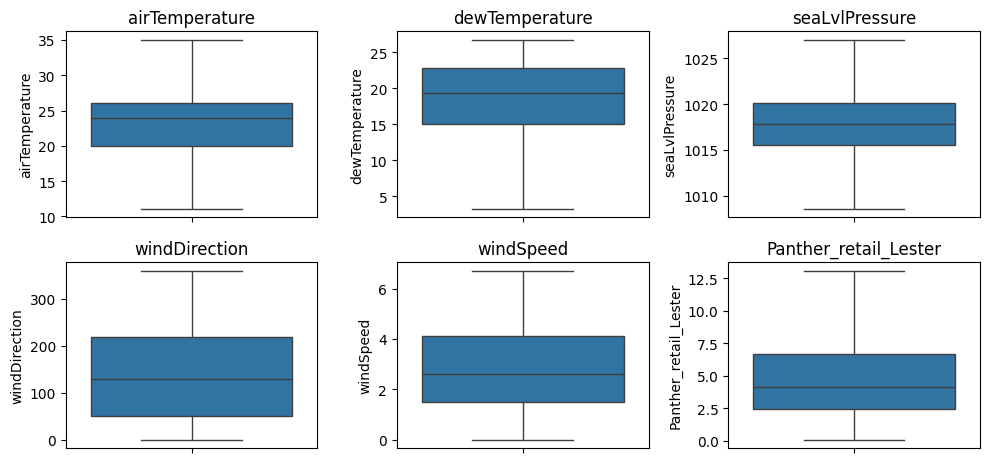

In [ ]:
#Plot the data after deleting the outliers
plt.figure(figsize=(10, 7))
for i, col in enumerate(df_imputed.columns):
  plt.subplot(3, 3, i + 1)
  sns.boxplot(df_outliers[col])
  plt.title(col)
plt.tight_layout()
plt.show()

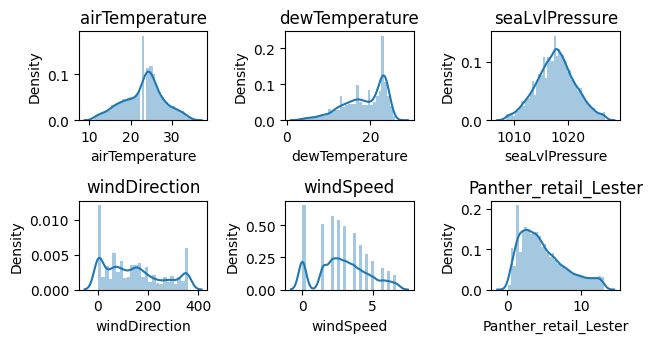

In [ ]:
#Plot the data
for i, col in enumerate(df_outliers.columns):
  plt.subplot(3, 3, i + 1)
  sns.distplot(df_outliers[col])
  plt.title(col)
plt.tight_layout()
plt.show()

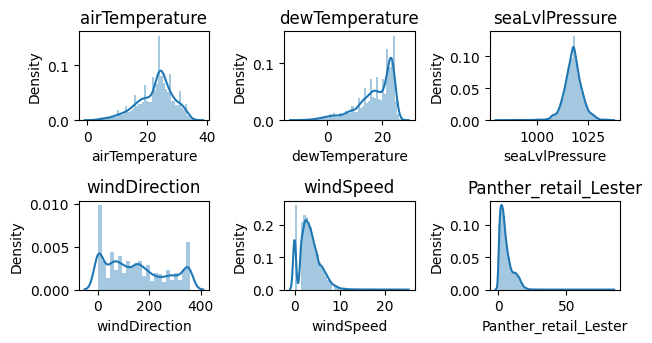

In [ ]:
#Plot the data that have outliers
for i, col in enumerate(df_imputed.columns):
  plt.subplot(3, 3, i + 1)
  sns.distplot(df_imputed[col])
  plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
#Save the cleaned data
df_outliers.to_csv('df_cleaned.csv')

## Split The data

Important Note:
    Before running the next cells first restart the session
    IDK why but it increased the accuracy of the model

In [ ]:
import os
os.kill(os.getpid(), 9)
#Reestart the session

In [ ]:
!pip install scikit-learn==1.5.2
#I installed this version bec it's compatible with xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 88.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('df_cleaned.csv')#Loda the data

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
# df = df_outliers.copy()

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

##Model selection and comparison

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, n_estimators=300)
rf.fit(xtrain, ytrain)

RandomForestRegressor(n_estimators=300, random_state=42)

In [ ]:
ypred1 = rf.predict(xtest)
ABS = np.abs(ypred1 - ytest)
print('MSE :', mean_squared_error(ytest, ypred1)) # 1.534348641058696
print('R2 :', r2_score(ytest, ypred1)) # 0.8425733500862417
print('ABS :', np.mean(ABS)) # 0.8869284703485102

MSE : 1.534348641058696
R2 : 0.8425733500862417
ABS : 0.8869284703485102


###Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(xtrain, ytrain)

DecisionTreeRegressor(random_state=42)

In [ ]:
ypred2 = dt.predict(xtest)
ABS = np.abs(ypred2 - ytest)
print('MSE :', mean_squared_error(ytest, ypred2))#    : 2.9376230294266437
print('R2 :', r2_score(ytest, ypred2))  #   : 0.6985951303003428
print('ABS :', np.mean(ABS))  #    : 1.1790055649241147

MSE : 2.9376230294266437
R2 : 0.6985951303003428
ABS : 1.1790055649241147


### XGBRegressor

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgbr = XGBRegressor(random_state = 42, n_estimators = 300)
xgbr.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
xgbr_pred = xgbr.predict(xtest)
ABS = np.abs(xgbr_pred - ytest)
print('MSE :', mean_squared_error(ytest, xgbr_pred))#  :  1.6803479447322824
print('R2 :', r2_score(ytest, xgbr_pred)) #  :  0.8275935856102781
print('ABS :', np.mean(ABS)) #   :  0.9241845266374076

MSE : 1.6803479447322824
R2 : 0.8275935856102781
ABS : 0.9241845266374076


**Best model is RandomForest**


In [ ]:
best_model = rf

In [ ]:
# from sklearn.model_selection import GridSearchCV

In [ ]:
# params = {'n_estimators' : [100, 200, 300, 500, 800],
#           'max_depth' : [2, 4, 6, 10, None],
#           'max_leaf_nodes' : [1, 2, 4 ,5, 7, None],
#           'bootstrap' : [True, False],
#           'max_features' : ['sqrt', 'log2', None, 1]}

In [ ]:
# grid = GridSearchCV(estimator=best_model, param_grid=params, n_jobs=-1)

In [ ]:
# grid.fit(xtrain, ytrain)

In [ ]:
# print(grid.best_params_)

In [ ]:
# with open('Model_best_params.txt', 'w') as f:
#   f.write(str(grid.best_params_))
# #

In [ ]:
# params = {'bootstrap': True, 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'n_estimators': 800}

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
best_model = RandomForestRegressor(random_state=42, bootstrap = True, max_depth = None, max_features = None, max_leaf_nodes = None, n_estimators = 800)
best_model.fit(xtrain, ytrain)

RandomForestRegressor(max_features=None, n_estimators=800, random_state=42)

In [ ]:
ypred = best_model.predict(xtest)
ABS = np.abs(ypred - ytest)
print('MSE :', mean_squared_error(ytest, ypred))
print('R2 :', r2_score(ytest, ypred))
print('ABS :', np.mean(ABS))

MSE : 1.5314972949330066
R2 : 0.8428659028062038
ABS : 0.8858945559654304
